In [155]:
#Importing necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')


In [156]:
# loading data set

dataset = pd.read_csv('day.csv')
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [157]:
dataset.shape

(730, 16)

In [158]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [159]:
# Checking for null values
dataset.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [160]:
#dropping 'instant' column from data since it is just an index and will have no impact on model

dataset = dataset.drop('instant', axis=1)

In [161]:
# dropping 'dteday' from data set since all valuable information like year,month,  weekday, working day is already there in other columns
dataset = dataset.drop('dteday', axis=1)
dataset.shape

(730, 14)

In [162]:
# dropping 'casual' and 'registered' columns since our target column 'cnt' is simply sum of these columns
dataset = dataset.drop('casual', axis=1)
dataset = dataset.drop('registered', axis=1)

In [163]:
#Columns with continuous data 
cont_cols = ['temp', 'atemp', 'hum', 'windspeed']

#Columns with categorical data
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

#target variable

target_var = ['cnt']

len(cont_cols)+len(cat_cols)+len(target_var)

12

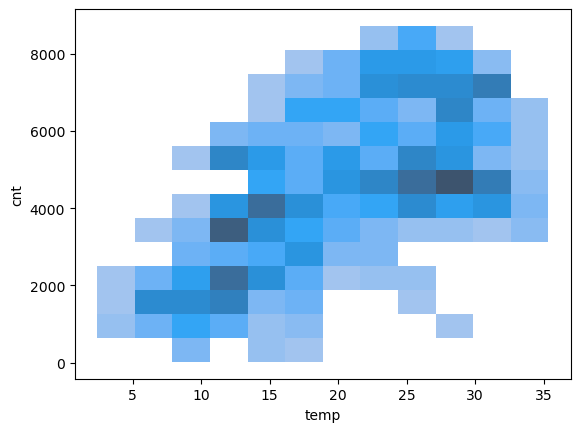

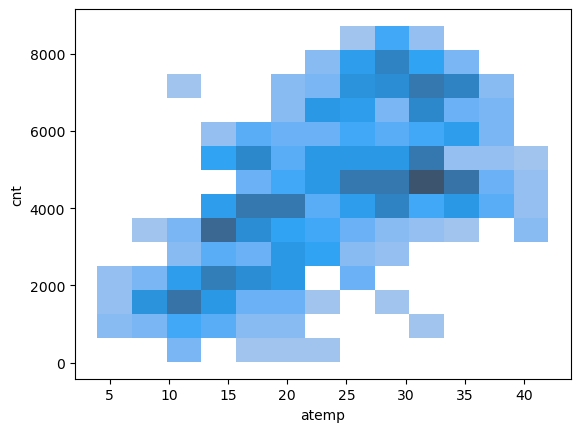

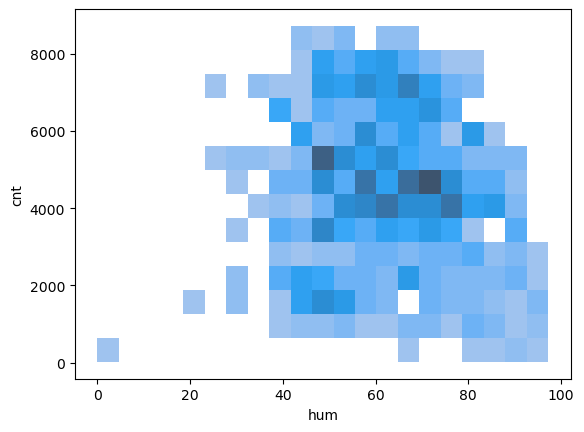

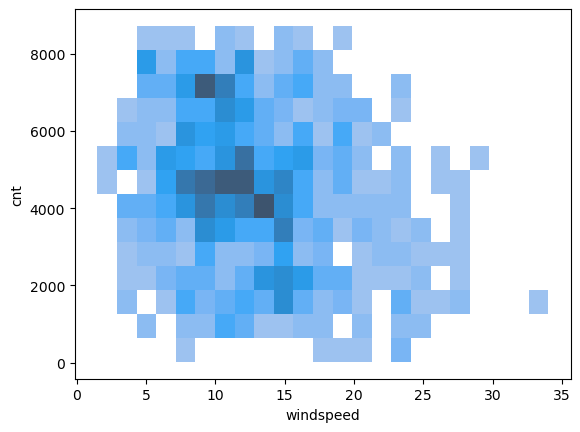

In [164]:
# univariate analysis for continuous columns

for i in cont_cols:
    sns.histplot(x=dataset[i], y=dataset['cnt'])
    plt.show()

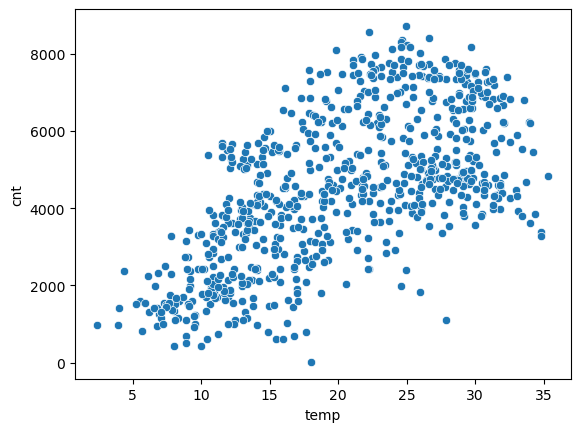

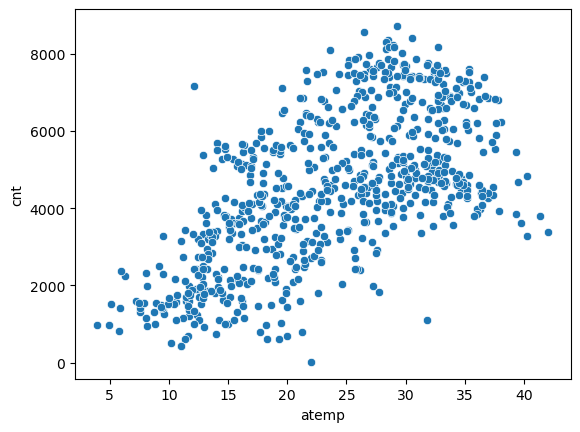

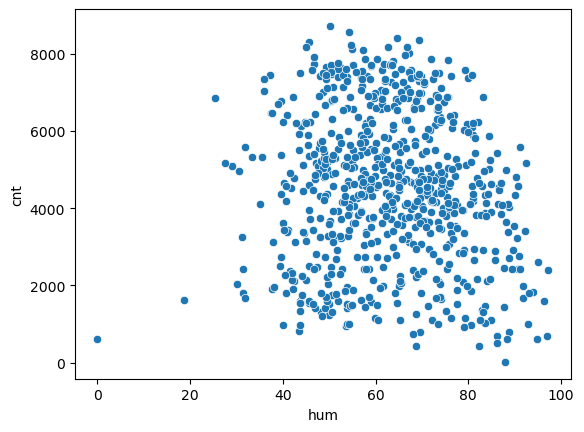

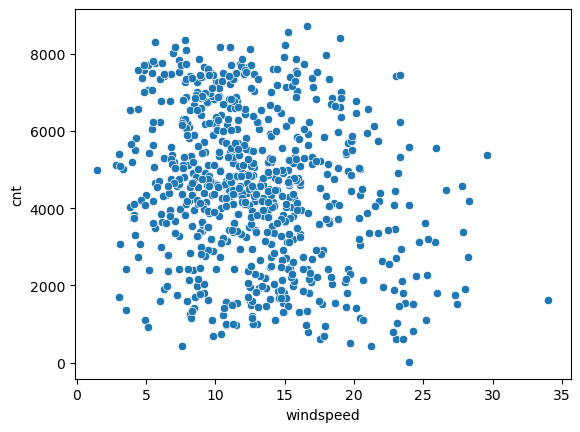

In [165]:
#bivariate analysis of continuous variables

for i in cont_cols:
    sns.scatterplot(x=dataset[i], y=dataset['cnt'])
    plt.show()

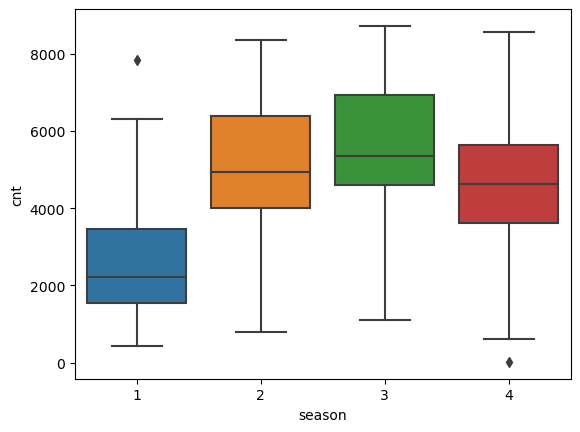

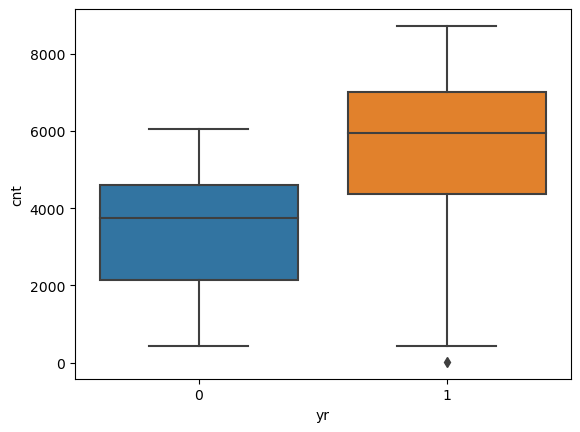

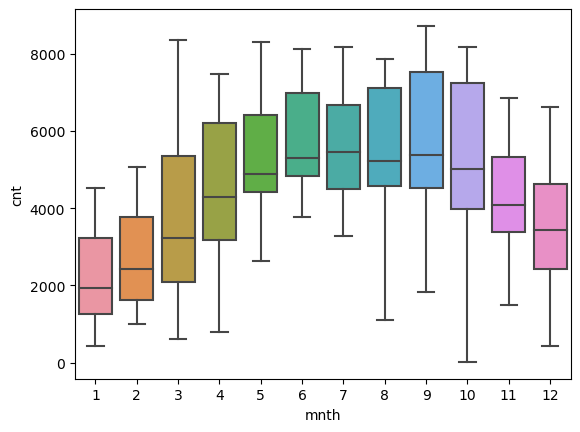

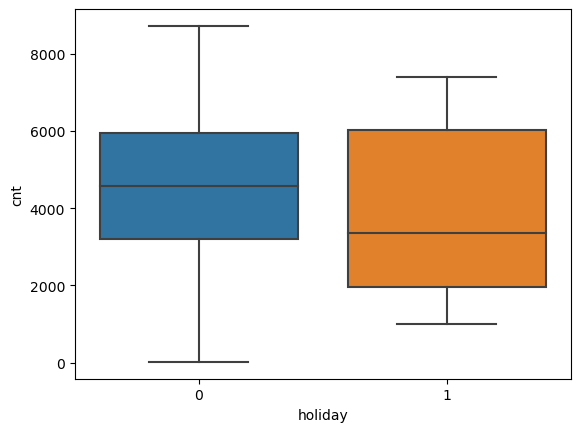

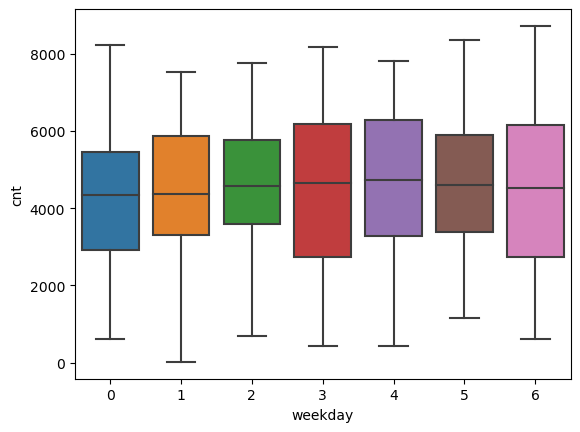

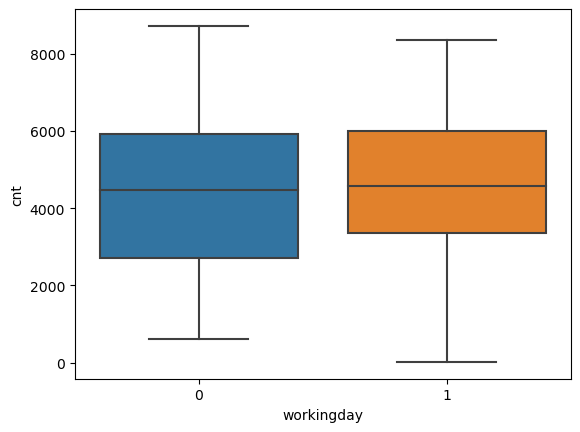

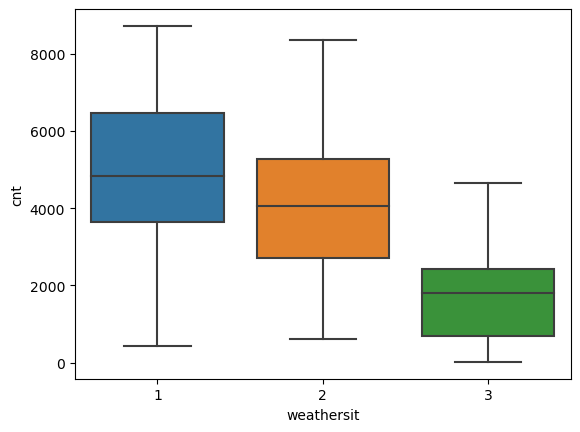

In [166]:
# bivaliate analysis on categorical variables

for i in cat_cols:
    sns.boxplot(x=dataset[i],y= dataset['cnt'])
    plt.show()    

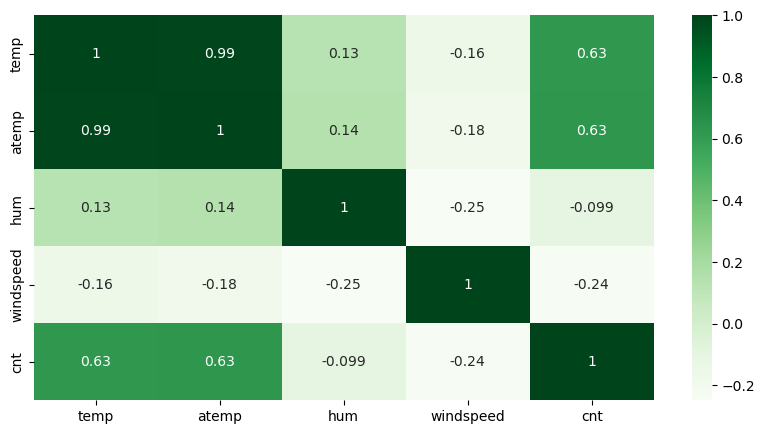

In [167]:
#correlation of continuous variables with target variable
plt.figure(figsize=(10,5))
sns.heatmap(dataset[cont_cols+['cnt']].corr(), annot=True, cmap='Greens')
plt.show()

In [168]:
dataset[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [169]:
#creating dummies for categorical values

dum = pd.get_dummies(dataset[['season', 'mnth', 'weekday', 'weathersit']], prefix=['season','month', 'weekday', 'weather'], columns = ['season', 'mnth', 'weekday', 'weathersit'], drop_first= True)
dum.head()

,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [170]:
# adding dummy columns to dataset
dataset1 = pd.concat([dataset, dum], axis=1)

In [171]:
#dropping original columns

dataset1=dataset1.drop(['season'], axis=1)
dataset1=dataset1.drop(['mnth'], axis=1)
dataset1=dataset1.drop(['weekday'], axis=1)
dataset1=dataset1.drop(['weathersit'], axis=1)

dataset1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [172]:
dataset1.shape

(730, 30)

# Making Model


In [173]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dataset1, test_size=0.3, random_state=100)

In [174]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,1,0


In [175]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [176]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [177]:
y_train = df_train.pop('cnt')
X_train = df_train

# Selecting features using RFE

In [178]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
estimator.fit(X_train, y_train)
selector = RFE(estimator, n_features_to_select=15)
selector = selector.fit(X_train, y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True])

In [179]:
X_train.columns[selector.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'month_3', 'month_5', 'month_8', 'month_9', 'weekday_6',
       'weather_2', 'weather_3'],
      dtype='object')

In [180]:
selected_features = X_train.columns[selector.support_]

In [181]:
X_train = X_train[selected_features]


In [182]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)


# Manual feature elimination

In [183]:
model1 = sm.OLS(y_train, X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          8.18e-191
Time:                        17:19:00   Log-Likelihood:                 518.29
No. Observations:                 511   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -936.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1871      0.029      6.428      0.000       0.130       0.244
yr             0.2296      0.008     28.665      0.000       0.214       0.245
holiday       -0.0559      0.027     -2.069      0.039      -0.109      -0.003
workingday     0.0426      0.012      3.679      0.000       0.020       0.065
temp           0.5432      0.022     24.687      0.000       0.500       0.586
hum           -0.1731      0.037     -4.620      0.000      -0.247      -0.099
windspeed     -0.1839      0.025     -7.247      0.000      -0.234      -0.134
season_2       0.0965      0.012      8.004      0.000       0.073       0.120
season_4       0.1531      0.011     14.217      0.000       0.132       0.174
month_3        0.0238      0.014      1.672      0.095      -0.004       0.052
month_5        0.0211      0.017      1.209      0.227      -0.013       0.055
month_8        0.0556      0.016      3.432      0.001       0.024       0.087
month_9        0.1223      0.016      7.607      0.000       0.091       0.154
weekday_6      0.0513      0.015      3.518      0.000       0.023       0.080
weather_2     -0.0564      0.010     -5.432      0.000      -0.077      -0.036
weather_3     -0.2414      0.026     -9.245      0.000      -0.293      -0.190
==============================================================================
Omnibus:                       63.436   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.240
Skew:                          -0.665   Prob(JB):                     1.76e-32
Kurtosis:                       5.259   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train, i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,2.037795
1,holiday,1.158634
2,workingday,5.071286
3,temp,9.949838
4,hum,16.935881
5,windspeed,3.958036
6,season_2,2.302546
7,season_4,1.844527
8,month_3,1.262875
9,month_5,1.628199


In [185]:
X_train = X_train.drop(['month_5'], axis = 1)


In [186]:
X_train_sm = sm.add_constant(X_train)


In [187]:
model2 = sm.OLS(y_train, X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.19e-191
Time:                        17:19:02   Log-Likelihood:                 517.54
No. Observations:                 511   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -941.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1832      0.029      6.330      0.000       0.126       0.240
yr             0.2292      0.008     28.627      0.000       0.214       0.245
holiday       -0.0563      0.027     -2.085      0.038      -0.109      -0.003
workingday     0.0429      0.012      3.703      0.000       0.020       0.066
temp           0.5449      0.022     24.800      0.000       0.502       0.588
hum           -0.1663      0.037     -4.487      0.000      -0.239      -0.093
windspeed     -0.1848      0.025     -7.286      0.000      -0.235      -0.135
season_2       0.1032      0.011      9.603      0.000       0.082       0.124
season_4       0.1522      0.011     14.162      0.000       0.131       0.173
month_3        0.0211      0.014      1.502      0.134      -0.007       0.049
month_8        0.0540      0.016      3.342      0.001       0.022       0.086
month_9        0.1208      0.016      7.534      0.000       0.089       0.152
weekday_6      0.0511      0.015      3.501      0.001       0.022       0.080
weather_2     -0.0567      0.010     -5.461      0.000      -0.077      -0.036
weather_3     -0.2436      0.026     -9.351      0.000      -0.295      -0.192
==============================================================================
Omnibus:                       62.474   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.748
Skew:                          -0.668   Prob(JB):                     7.43e-31
Kurtosis:                       5.176   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train, i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,2.031056
1,holiday,1.157323
2,workingday,5.068890
3,temp,9.936136
4,hum,16.760139
5,windspeed,3.913371
6,season_2,1.825990
7,season_4,1.834643
8,month_3,1.227526
9,month_8,1.599297


In [189]:
X_train = X_train.drop(['month_3'], axis=1)


In [190]:
X_train_sm = sm.add_constant(X_train)

model3 = sm.OLS(y_train, X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.46e-192
Time:                        17:19:03   Log-Likelihood:                 516.38
No. Observations:                 511   AIC:                            -1005.
Df Residuals:                     497   BIC:                            -945.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1882      0.029      6.541      0.000       0.132       0.245
yr             0.2294      0.008     28.612      0.000       0.214       0.245
holiday       -0.0579      0.027     -2.142      0.033      -0.111      -0.005
workingday     0.0436      0.012      3.766      0.000       0.021       0.066
temp           0.5400      0.022     24.824      0.000       0.497       0.583
hum           -0.1672      0.037     -4.506      0.000      -0.240      -0.094
windspeed     -0.1825      0.025     -7.199      0.000      -0.232      -0.133
season_2       0.1030      0.011      9.582      0.000       0.082       0.124
season_4       0.1487      0.011     14.155      0.000       0.128       0.169
month_8        0.0521      0.016      3.234      0.001       0.020       0.084
month_9        0.1193      0.016      7.446      0.000       0.088       0.151
weekday_6      0.0519      0.015      3.555      0.000       0.023       0.081
weather_2     -0.0567      0.010     -5.450      0.000      -0.077      -0.036
weather_3     -0.2422      0.026     -9.293      0.000      -0.293      -0.191
==============================================================================
Omnibus:                       62.019   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.701
Skew:                          -0.647   Prob(JB):                     3.79e-32
Kurtosis:                       5.263   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train, i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,2.028719
1,holiday,1.156910
2,workingday,5.026322
3,temp,9.776272
4,hum,16.557272
5,windspeed,3.831150
6,season_2,1.825835
7,season_4,1.753269
8,month_8,1.587834
9,month_9,1.307806


In [192]:
X_train = X_train.drop(['hum'], axis=1)


In [193]:
X_train_sm = sm.add_constant(X_train)

model4 = sm.OLS(y_train, X_train_sm)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.29e-189
Time:                        17:19:04   Log-Likelihood:                 506.15
No. Observations:                 511   AIC:                            -986.3
Df Residuals:                     498   BIC:                            -931.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0897      0.019      4.703      0.000       0.052       0.127
yr             0.2332      0.008     28.703      0.000       0.217       0.249
holiday       -0.0561      0.028     -2.037      0.042      -0.110      -0.002
workingday     0.0468      0.012      3.974      0.000       0.024       0.070
temp           0.5191      0.022     23.964      0.000       0.477       0.562
windspeed     -0.1507      0.025     -6.071      0.000      -0.199      -0.102
season_2       0.1003      0.011      9.163      0.000       0.079       0.122
season_4       0.1394      0.010     13.277      0.000       0.119       0.160
month_8        0.0507      0.016      3.088      0.002       0.018       0.083
month_9        0.1133      0.016      6.964      0.000       0.081       0.145
weekday_6      0.0570      0.015      3.845      0.000       0.028       0.086
weather_2     -0.0835      0.009     -9.601      0.000      -0.101      -0.066
weather_3     -0.2880      0.024    -11.766      0.000      -0.336      -0.240
==============================================================================
Omnibus:                       61.247   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.643   Prob(JB):                     2.10e-31
Kurtosis:                       5.232   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train, i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,2.024471
1,holiday,1.120918
2,workingday,4.363334
3,temp,6.213319
4,windspeed,3.605263
5,season_2,1.819301
6,season_4,1.525872
7,month_8,1.581769
8,month_9,1.307351
9,weekday_6,1.762073


In [195]:
X_train = X_train.drop(['holiday'], axis=1)


In [196]:
X_train_sm = sm.add_constant(X_train)

model5 = sm.OLS(y_train, X_train_sm)
res5 = model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.4
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.64e-189
Time:                        17:19:05   Log-Likelihood:                 504.03
No. Observations:                 511   AIC:                            -984.1
Df Residuals:                     499   BIC:                            -933.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0803      0.019      4.326      0.000       0.044       0.117
yr             0.2334      0.008     28.630      0.000       0.217       0.249
workingday     0.0551      0.011      4.971      0.000       0.033       0.077
temp           0.5211      0.022     24.007      0.000       0.478       0.564
windspeed     -0.1516      0.025     -6.091      0.000      -0.201      -0.103
season_2       0.1010      0.011      9.200      0.000       0.079       0.123
season_4       0.1391      0.011     13.211      0.000       0.118       0.160
month_8        0.0510      0.016      3.095      0.002       0.019       0.083
month_9        0.1114      0.016      6.837      0.000       0.079       0.143
weekday_6      0.0654      0.014      4.579      0.000       0.037       0.094
weather_2     -0.0830      0.009     -9.520      0.000      -0.100      -0.066
weather_3     -0.2867      0.025    -11.682      0.000      -0.335      -0.238
==============================================================================
Omnibus:                       65.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.605
Skew:                          -0.675   Prob(JB):                     3.62e-35
Kurtosis:                       5.372   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train, i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,2.022718
1,workingday,4.049227
2,temp,6.107568
3,windspeed,3.491707
4,season_2,1.818259
5,season_4,1.512323
6,month_8,1.580064
7,month_9,1.304391
8,weekday_6,1.688436
9,weather_2,1.540513


In [198]:
X_train = X_train.drop(['month_8'], axis=1)


In [199]:
X_train_sm = sm.add_constant(X_train)

model6 = sm.OLS(y_train, X_train_sm)
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.13e-188
Time:                        17:19:06   Log-Likelihood:                 499.17
No. Observations:                 511   AIC:                            -976.3
Df Residuals:                     500   BIC:                            -929.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0744      0.019      3.996      0.000       0.038       0.111
yr             0.2336      0.008     28.424      0.000       0.217       0.250
workingday     0.0566      0.011      5.067      0.000       0.035       0.079
temp           0.5501      0.020     27.839      0.000       0.511       0.589
windspeed     -0.1550      0.025     -6.182      0.000      -0.204      -0.106
season_2       0.0886      0.010      8.595      0.000       0.068       0.109
season_4       0.1318      0.010     12.736      0.000       0.111       0.152
month_9        0.0971      0.016      6.162      0.000       0.066       0.128
weekday_6      0.0676      0.014      4.696      0.000       0.039       0.096
weather_2     -0.0805      0.009     -9.191      0.000      -0.098      -0.063
weather_3     -0.2878      0.025    -11.629      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       68.737   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.172
Skew:                          -0.730   Prob(JB):                     9.04e-34
Kurtosis:                       5.239   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train, i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,2.022676
1,workingday,4.049178
2,temp,4.768043
3,windspeed,3.440536
4,season_2,1.571211
5,season_4,1.400057
6,month_9,1.200840
7,weekday_6,1.688141
8,weather_2,1.531626
9,weather_3,1.083001


In [209]:
res6.params

const         0.074417
yr            0.233643
workingday    0.056634
temp          0.550076
windspeed    -0.155035
season_2      0.088584
season_4      0.131824
month_9       0.097117
weekday_6     0.067612
weather_2    -0.080480
weather_3    -0.287809
dtype: float64

In [201]:
y_train_pred = res6.predict(X_train_sm)

# Residual Analysis

<Axes: ylabel='Density'>

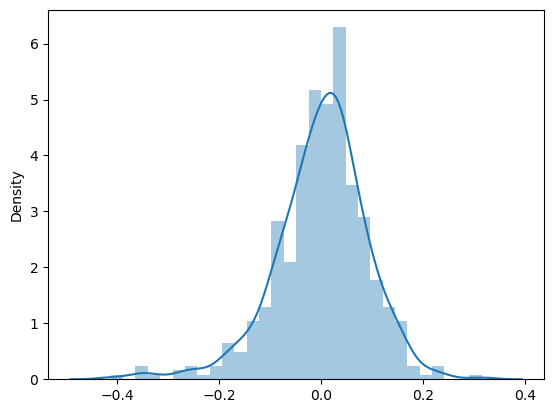

In [202]:
residual = y_train-y_train_pred
sns.distplot(residual)


In [203]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,month_11,month_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [204]:
y_test = df_test.pop('cnt')
X_test = df_test

In [205]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]
y_test_pred = res6.predict(X_test_sm)

# Final r2 score on test set

In [206]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_test_pred)

0.7955645438360068